**This notebook is taken from this tutorial:** https://www.dataquest.io/blog/jupyter-notebook-tutorial/


Please refer to this tutorial for further details on jupyter notebooks.

# 1. The jupyter notebook interface

Now that you have an open notebook in front of you, its interface will hopefully not look entirely alien. After all, Jupyter is essentially just an advanced word processor.

Why not take a look around? Check out the menus to get a feel for it, especially take a few moments to scroll down the list of commands in the command palette, which is the small button with the keyboard icon (or by pressing `Ctrl + Shift + P`).


There are two fairly prominent terms that you should notice, which are probably new to you: **cells** and **kernels** are key both to understanding Jupyter and to what makes it more than just a word processor. Fortunately, these concepts are not difficult to understand.

- A **kernel** is a “computational engine” that executes the code contained in a notebook document.
- A **cell** is a container for text to be displayed in the notebook or code to be executed by the notebook’s kernel.

## Details on cells

There are two main cell types that we will cover:

- A *code cell* contains code to be executed in the kernel. When the code is run, the notebook displays the output below the code cell that generated it.
- A *Markdown cell* contains text formatted using [Markdown](https://www.markdownguide.org/basic-syntax/) and displays its output in-place when the Markdown cell is run.

Let’s test it out with a classic hello world example: Type `print('Hello World!')` into the cell and click the `Run` button in the command panel (or toolbar) above or press `Shift + Enter` (or `Ctrl + Enter` on Windows).

In [1]:
print('Hello World!')

Hello World!


When we run the cell, its output is displayed below and the label to its left will have changed from `In [ ]` to `In [1]`.

The output of a code cell also forms part of the document, which is why you can see it in this article. You can always tell the difference between code and Markdown cells because code cells have that label on the left and Markdown cells do not.

The `In` part of the label is simply short for “Input,” while the label number indicates when the cell was executed on the kernel — in this case the cell was executed first.

Run the cell again and the label will change to `In [2]` because now the cell was the second to be run on the kernel. It will become clearer why this is so useful later on when we take a closer look at kernels.

From the command panel, click `Insert` and select `Insert Cell Below` to create a new code cell underneath your first and try out the following code to see what happens. Do you notice anything different?

In [2]:
import time
time.sleep(3)

This cell doesn’t produce any output, but it does take three seconds to execute. Notice how Jupyter signifies when the cell is currently running by changing its label to `In [*]`. 

**Importantly**, cells should generally be executed in sequential order (like a computer script; from top to bottom). Therefore, if something breaks or you accidentally made changes to the data, restart the notebook (by pressing `Kernel` and then `Restart` in the command panel on the top of the notebook; or `Runtime` and the `Restart Runtime` in Google Colab) and then click again through each cell with `Shift + Enter` (or `Ctrl + Enter`)

# 2. An exemplary analysis pipeline

It’s common to start off with a code cell specifically for imports and setup, so that if you choose to add or change anything, you can simply edit and re-run the cell without causing any side-effects.

In [3]:
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_style("ticks")
sns.set_context("paper")

import matplotlib.pyplot as plt
%matplotlib inline

We're importing [pandas](https://pandas.pydata.org) to work with our data, [Matplotlib](https://matplotlib.org) to plot charts, and [Seaborn](https://seaborn.pydata.org) to make our charts prettier.

**Note:** That last line isn’t a Python command, but uses something called a [line magic](https://ipython.readthedocs.io/en/stable/interactive/magics.html) to instruct Jupyter to capture Matplotlib plots and render them in the cell output. 

## 2.1 Loading and cleaning data with Pandas

For this analysis, we will use a data set of Fortune 500 companies spanning over 50 years since the list’s first publication in 1955, put together from [Fortune’s public archive](https://archive.fortune.com/magazines/fortune/fortune500_archive/full/2005/).

With this data set, we will explore how the profits of the largest companies in the US changed historically.

For now, let’s go ahead and load our data.

In [4]:
url = 'https://s3.amazonaws.com/dq-blog-files/fortune500.csv'
df = pd.read_csv(url) # you can also access this dataset in the data folder

We’ve loaded our data set df into the most-used pandas data structure, which is called a DataFrame and basically looks like a table. What does ours look like?

In [5]:
df.head()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1


In [6]:
df.tail()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
25495,2005,496,Wm. Wrigley Jr.,3648.6,493
25496,2005,497,Peabody Energy,3631.6,175.4
25497,2005,498,Wendy's International,3630.4,57.8
25498,2005,499,Kindred Healthcare,3616.6,70.6
25499,2005,500,Cincinnati Financial,3614.0,584


Looking good. We have the columns we need, and each row corresponds to a single company in a single year.

Let’s just rename those columns so we can refer to them later more easily.

In [7]:
df.columns = ['year', 'rank', 'company', 'revenue', 'profit']

Next, we need to explore our data set. Is it complete? Did pandas read it as expected? Are any values missing?

In [8]:
len(df)

25500

Okay, that looks good — that’s 500 rows for every year from 1955 to 2005, inclusive.

Let’s also check whether our data set has been imported as we would expect. A simple check is to see if the data types (or dtypes) have been correctly interpreted.

In [9]:
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit      object
dtype: object

It looks like there’s something wrong with the profits column — we would expect it to be a float64 like the revenue column. This indicates that it probably contains some non-integer values, so let’s take a look.

In [10]:
non_numberic_profits = df.profit.str.contains('[^0-9.-]')
df.loc[non_numberic_profits].head()

,year,rank,company,revenue,profit
228,1955,229,Norton,135.0,N.A.
290,1955,291,Schlitz Brewing,100.0,N.A.
294,1955,295,Pacific Vegetable Oil,97.9,N.A.
296,1955,297,Liebmann Breweries,96.0,N.A.
352,1955,353,Minneapolis-Moline,77.4,N.A.


Just as we suspected! Some of the values are strings, which have been used to indicate missing data. Are there any other values that have crept in?

In [11]:
set(df.profit[non_numberic_profits])

{'N.A.'}

That makes it easy to interpret, but what should we do? Well, that depends how many values are missing.

In [12]:
len(df.profit[non_numberic_profits])

369

It’s a small fraction of our data set, though not completely inconsequential as it is still around 1.5%.

If rows containing N.A. are, roughly, uniformly distributed over the years, the easiest solution would just be to remove them. So let’s have a quick look at the distribution.

Text(0, 0.5, 'Number of missing values')

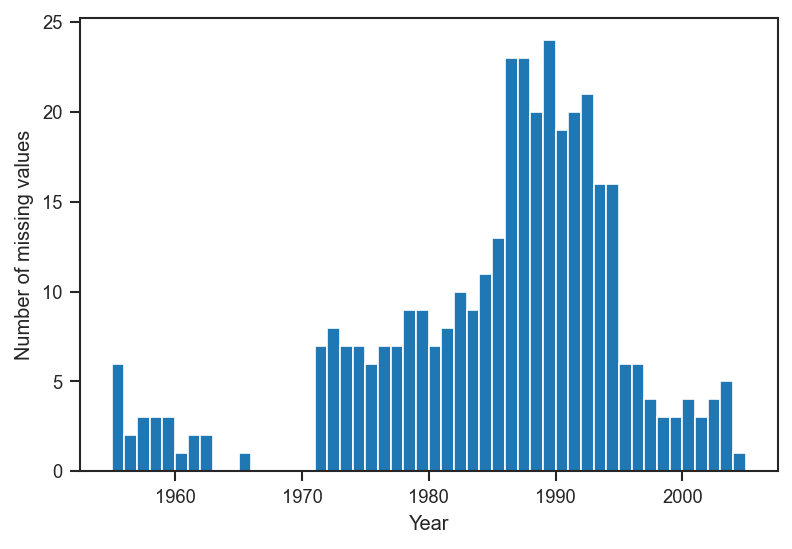

In [13]:
fig, ax = plt.subplots(dpi=150)
ax.hist(df.year[non_numberic_profits], bins=range(1955, 2006))
ax.set_xlabel('Year')
ax.set_ylabel('Number of missing values')

At a glance, we can see that the most invalid values in a single year is fewer than 25, and as there are 500 data points per year, removing these values would account for less than 4% of the data for the worst years. Indeed, other than a surge around the 90s, most years have fewer than half the missing values of the peak.

For our purposes, let’s say this is acceptable and go ahead and remove these rows.

In [14]:
df = df.loc[~non_numberic_profits]
df.profit = df.profit.apply(pd.to_numeric)

We should check whether that worked.

In [15]:
len(df)

25131

In [16]:
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit     float64
dtype: object

Great! We have finished our data set setup.

## 2.2 Plotting data with Matplotlib

Next, we can get to addressing the question at hand by plotting the average profit by year. We might as well plot the revenue as well, so first we can define some variables and a method to reduce our code.

In [17]:
def plot(x, y, ax, title, y_label):
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.plot(x, y)
    ax.margins(x=0, y=0)

In [18]:
group_by_year = df.loc[:, ['year', 'revenue', 'profit']].groupby('year')
avgs = group_by_year.mean()
x = avgs.index
y1 = avgs.profit

Now let's plot:

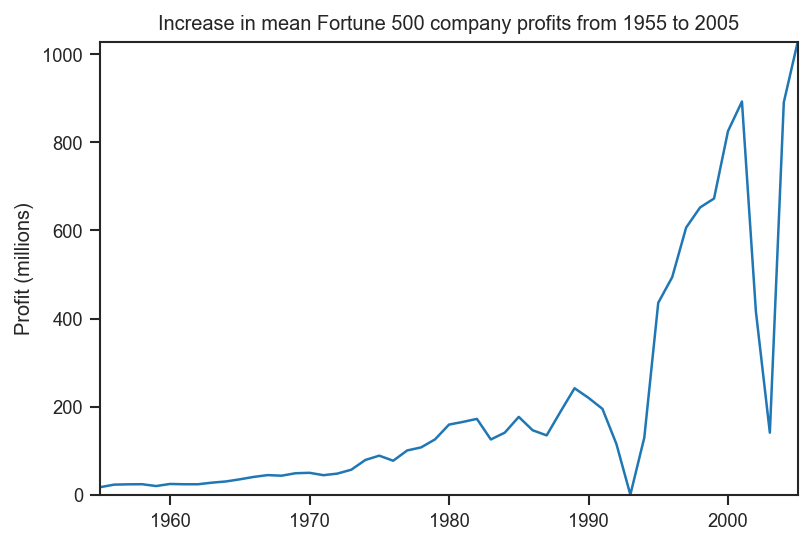

In [19]:
fig, ax = plt.subplots(dpi=150)
plot(x, y1, ax, 'Increase in mean Fortune 500 company profits from 1955 to 2005', 'Profit (millions)')

Wow, that looks like an exponential, but it’s got some huge dips. They must correspond to the early [1990s recession](https://en.wikipedia.org/wiki/Early_1990s_recession) and the [dot-com bubble](https://en.wikipedia.org/wiki/Dot-com_bubble). It’s pretty interesting to see that in the data. But how come profits recovered to even higher levels post each recession?

Maybe the revenues can tell us more.


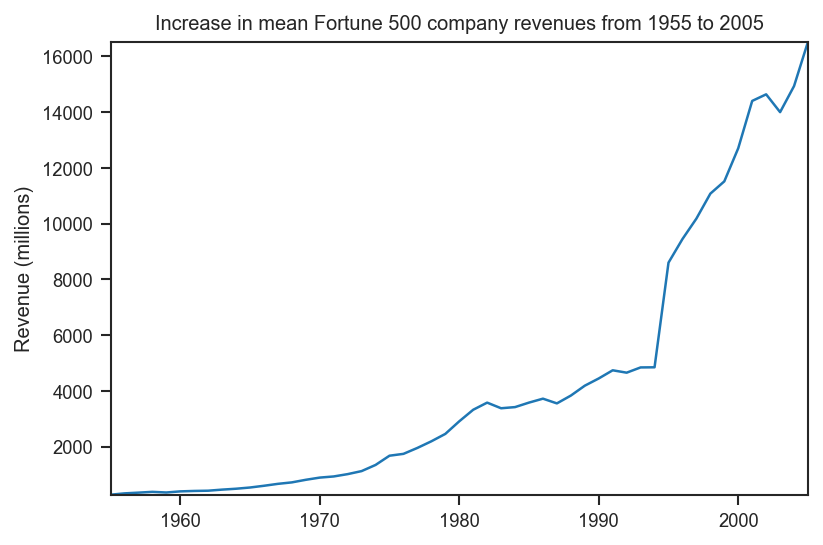

In [20]:
y2 = avgs.revenue
fig, ax = plt.subplots(dpi=150)
plot(x, y2, ax, 'Increase in mean Fortune 500 company revenues from 1955 to 2005', 'Revenue (millions)')

That adds another side to the story. Revenues were not as badly hit — that’s some great accounting work from the finance departments.

With a little help from [Stack Overflow](https://stackoverflow.com/questions/47581672/replacement-for-deprecated-tsplot/47582329#47582329), we can superimpose these plots with +/- their standard deviations.

In [21]:
def plot_with_std(x, y, stds, ax, title, y_label):
    ax.fill_between(x, y - stds, y + stds, alpha=0.2)
    plot(x, y, ax, title, y_label)

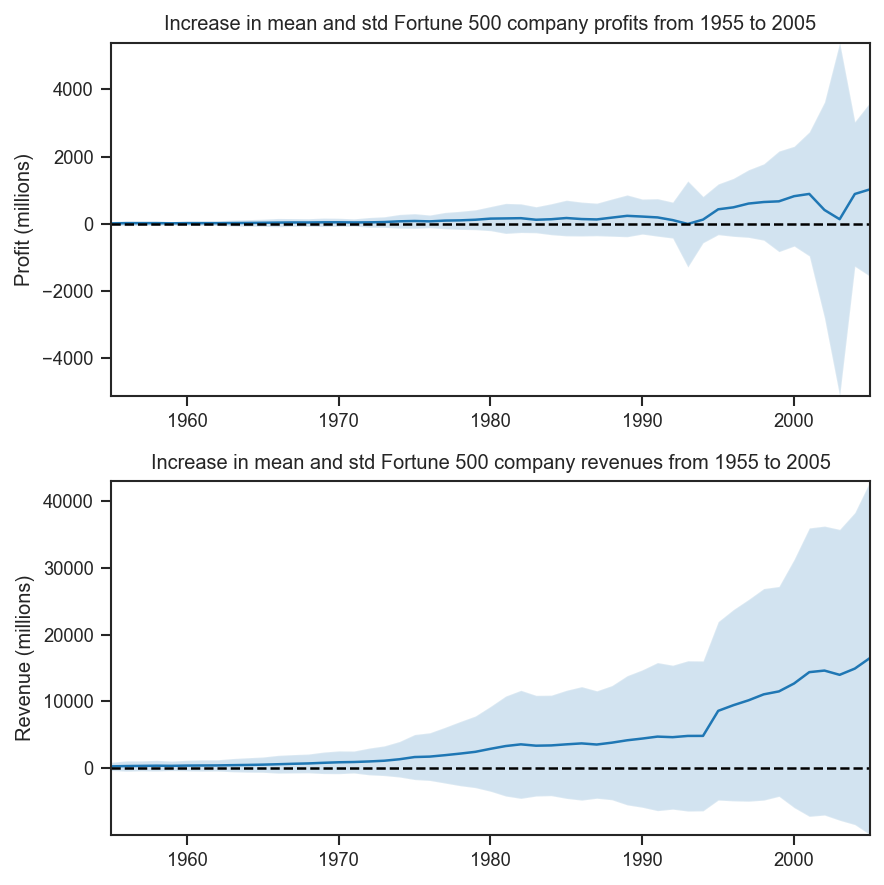

In [22]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6,6), dpi=150)
title = 'Increase in mean and std Fortune 500 company %s from 1955 to 2005'
stds1 = group_by_year.std().profit.values
stds2 = group_by_year.std().revenue.values
plot_with_std(x, y1.values, stds1, ax1, title % 'profits', 'Profit (millions)')
plot_with_std(x, y2.values, stds2, ax2, title % 'revenues', 'Revenue (millions)')
for ax in (ax1, ax2):
    ax.axhline(0, ls='--', color='k')
fig.tight_layout()

That’s staggering, the standard deviations are huge! Some Fortune 500 companies make billions while others lose billions, and the risk has increased along with rising profits over the years.

Perhaps some companies perform better than others; are the profits of the top 10% more or less volatile than the bottom 10%?

There are plenty of questions that we could look into next, and it’s easy to see how the flow of working in a notebook can match one’s own thought process. For the purposes of this tutorial, we'll stop our analysis here, but feel free to continue digging into the data on your own!